# Lady Gaga Instagram Posts

## Libs

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from pathlib import Path
from matplotlib.ticker import MaxNLocator
from matplotlib.dates import DateFormatter
from matplotlib.dates import AutoDateLocator


## DATA

In [2]:
current_path = Path.cwd()
data_dir = current_path.parent / 'data' / 'processed'
data = f'{data_dir}/instagram_ladygaga_2025-05-13_16-23-43_processed.csv'
df = pd.read_csv(data, sep=';', dtype={'post_id' : str})

In [3]:
df.head()

,post_id,caption,likes_count,media_url,date,time
0,3596969519542633090,The MAYHEM Ball,663508,https://scontent-man2-1.cdninstagram.com/o1/v/...,26-03-2025,18:04
1,3625179909652482815,Nothing could prepare me for the feeling I had...,4357790,NaN,04-05-2025,16:12
2,3591166785212736472,LAST NIGHT iheart💔radio thanks for the innovat...,1035287,NaN,18-03-2025,17:54
3,3596786733871926123,I wasn’t planning to tour this year after my s...,1452467,NaN,26-03-2025,12:00
4,3597786369592240862,I truly can’t get enough of all of your “Abrac...,474432,https://scontent-lhr6-1.cdninstagram.com/o1/v/...,27-03-2025,21:07


In [4]:
df.dtypes

post_id        object
caption        object
likes_count     int64
media_url      object
date           object
time           object
dtype: object

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [6]:
df = df.sort_values(by='likes_count')

## Bins

In [7]:
# Generate bins 
bins_0_to_1m = list(range(0, 1_100_000, 100_000))

# in steps of 100,000
bins_1m_to_10m = list(range(1_100_000, 10_100_000, 100_000))

# Combine and add infinity
bins = bins_0_to_1m + bins_1m_to_10m + [float('inf')]

# Generate labels
labels = []
for i in range(len(bins) - 1):
    value = bins[i]
    if value < 1_000_000:
        # Format as "Xk" or "<Xk" for the first bin
        if value == 0:
            labels.append(f'<{bins[i+1] // 1000}k')
        else:
            labels.append(f'{value // 1000}k+')
    else:
        # Format as "X.Ymi+"
        millions = value / 1_000_000
        labels.append(f'{millions:.1f}mi+')

In [8]:
df['likes_count_cat'] = pd.cut(df['likes_count'], bins=bins, labels=labels, right=False)


## Visualization

In [14]:
df = df.sort_values(by='date')
df.head()

,post_id,caption,likes_count,media_url,date,time,likes_count_cat
296,2762763769363647743,Happy Sunday 🌻,1631656,NaN,2022-01-30,18:25,1.6mi+
288,2762766051710894274,I’m so happy to be with Trigger today my big m...,687313,NaN,2022-01-30,18:29,600k+
291,2763355964813266706,Lady Gaga Jazz & Piano 🎺🎼 Returning to Las Veg...,257211,https://instagram.fagc1-2.fna.fbcdn.net/o1/v/t...,2022-01-31,14:02,200k+
293,2763556454341121790,Rollin’ into Monday like…🤟,941690,NaN,2022-01-31,20:40,900k+
287,2764200652048306506,Lady Gaga Jazz & Piano 🎺 🎼\nThe Little Monster...,276397,NaN,2022-02-01,18:00,200k+


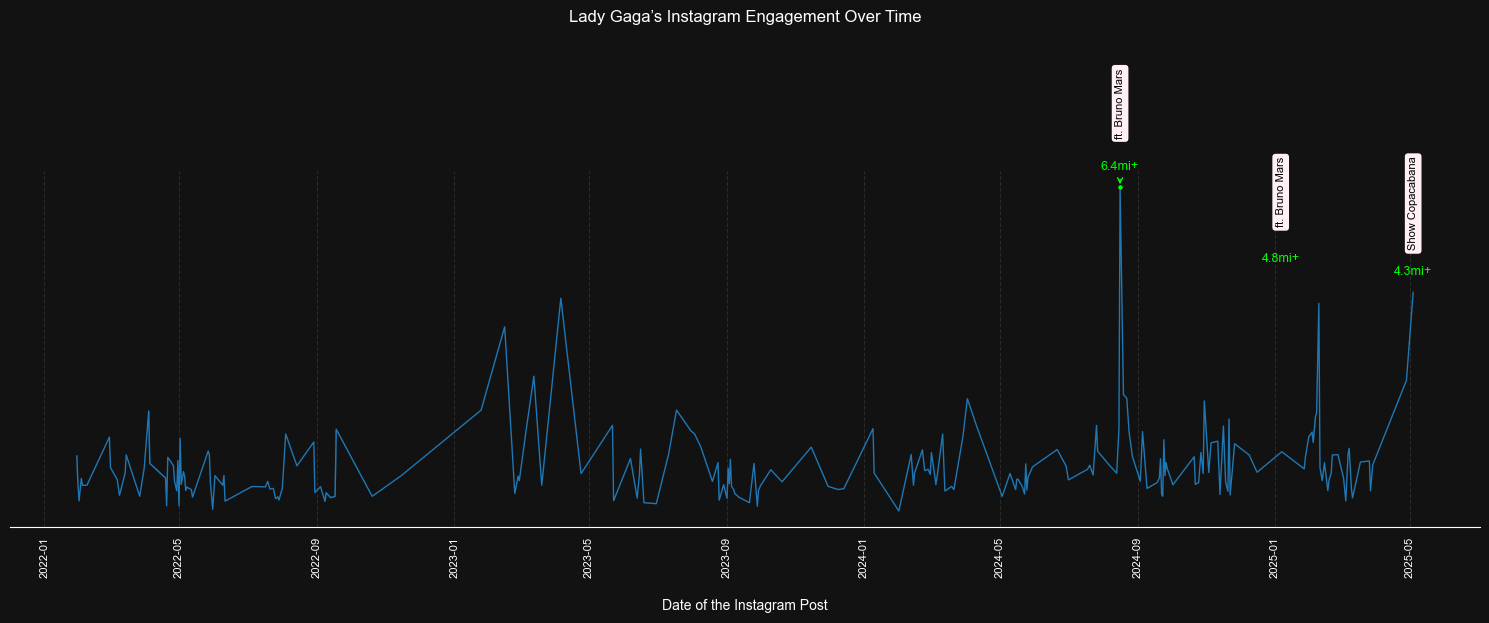

In [ ]:
# Set dark style manually
sns.set_style("darkgrid", {"axes.facecolor": "#121212"})  # very dark background
plt.figure(figsize=(15, 6), facecolor='#121212')

# Set Seaborn palette and other elements for dark theme
sns.set_palette(['#4C72B0'])  # keep a visible default line color

# Plot the line with markers and no error bars
ax = sns.lineplot(
    data=df,
    x='date',
    y='likes_count',
   # marker='o',
    linewidth=1,
    markersize=0.5,
    markerfacecolor='white',
    markeredgewidth=0.6,
    color='#1f77b4',
    errorbar=('ci', False)
)

# Identify max and min points
max_row = df.loc[df['likes_count'].idxmax()]
target_row = df.sort_values(by='likes_count', ascending=False).iloc[2]


# Highlight the max and min points
plt.scatter(max_row['date'], max_row['likes_count'], color='lime', s=5, zorder=5)

# Annotate the max point
plt.annotate(f"{max_row['likes_count_cat']}",
             xy=(max_row['date'], max_row['likes_count']),
             xytext=(0, 10), textcoords='offset points',
             ha='center', va='bottom',
             fontsize=9, color='lime',
             arrowprops=dict(arrowstyle='->', color='lime'))

# Annotate the max point
plt.annotate(f"{target_row['likes_count_cat']}",
             xy=(target_row['date'], target_row['likes_count']),
             xytext=(0, 10), textcoords='offset points',
             ha='center', va='bottom',
             fontsize=9, color='lime',
             )

# Add 'ft. Bruno Mars' label at the max point without arrow
ax.annotate('ft. Bruno Mars',
            xy=(max_row['date'], max_row['likes_count']),
            xytext=(0, 35), textcoords='offset points',
            ha='center', va='bottom', rotation='vertical',
            fontsize=8, color='black',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lavenderblush", edgecolor="none"))

#second max point
label_row = df[df['post_id'] == '3489922547783083926'].iloc[0]

# Annotate with the likes_count_cat and arrow
plt.annotate(f"{label_row['likes_count_cat']}",
             xy=(label_row['date'], label_row['likes_count']),
             xytext=(55, 3), textcoords='offset points',
             ha='center', va='bottom',
             fontsize=9, color='lime',
             )

# Annotate with the visual label (no arrow)
ax.annotate('ft. Bruno Mars',
            xy=(label_row['date'], label_row['likes_count']),
            xytext=(55, 30), textcoords='offset points',
            ha='center', va='bottom', rotation='vertical',
            fontsize=8, color='black',
            bbox=dict(boxstyle="round,pad=0.3",
                      facecolor="lavenderblush",
                      edgecolor="none"))

ax.annotate('Show Copacabana',
            xy=(target_row['date'], target_row['likes_count']),
            xytext=(0, 30), textcoords='offset points',
            ha='center', va='bottom', rotation = 'vertical',
            fontsize=8, color='black',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lavenderblush", edgecolor="none"))

# Customize title and labels
plt.suptitle("Lady Gaga’s Instagram Engagement Over Time",
             fontsize=12, weight='light', color='white', y=1.03)
plt.xlabel('Date of the Instagram Post', fontsize=10, labelpad=15, color='white')
plt.ylabel('', color='white')  # No label

# Format x-axis
plt.xticks(rotation=90, fontsize=8, color='white')
ax.xaxis.set_major_locator(AutoDateLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))

ax.set_xlim(df['date'].min() - pd.Timedelta(days=5),
            df['date'].max() + pd.Timedelta(days=5))

# Remove y-axis ticks
plt.yticks([], color='white')

# Set dark background color
ax = plt.gca()
ax.set_facecolor('#121212')
ax.grid(axis='x', linestyle='--', alpha=0.1, color='white')

# Clean up spines
sns.despine(top=True, right=True, left=True)

# Adjust layout
plt.tight_layout()
plt.show()


ConversionError: Failed to convert value(s) to axis units: Timestamp('2024-08-16 00:00:00')

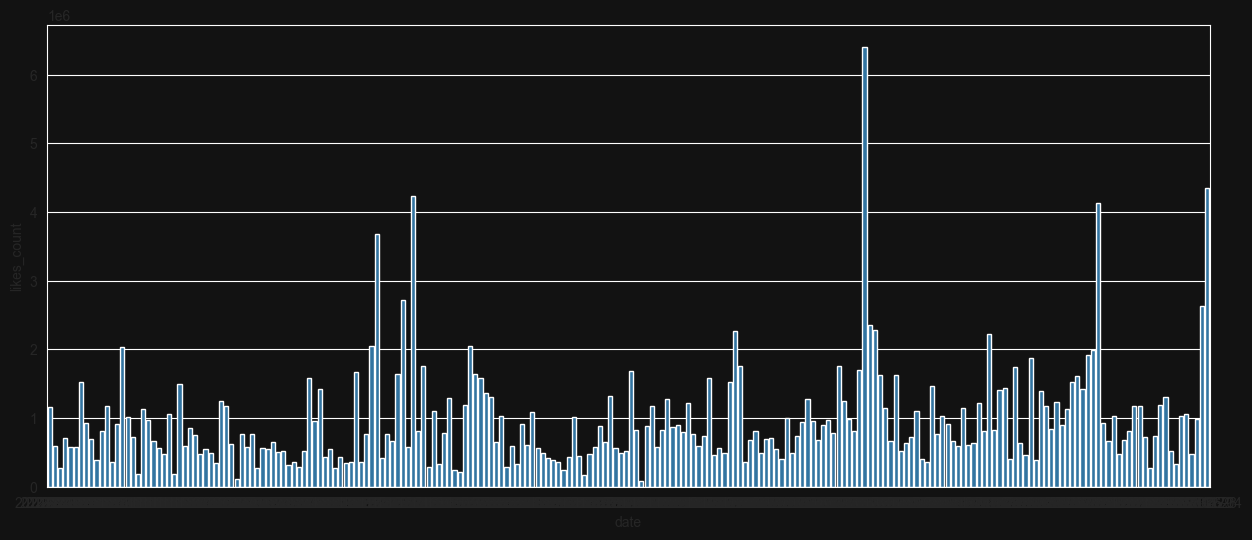

In [30]:
# Set dark style manually
sns.set_style("darkgrid", {"axes.facecolor": "#121212"})  # very dark background
plt.figure(figsize=(15, 6), facecolor='#121212')

# Set Seaborn palette and other elements for dark theme
sns.set_palette(['#4C72B0'])  # keep a visible default line color

# Plot the line with markers and no error bars
ax = sns.barplot(
    data=df,
    x='date',
    y='likes_count',
  #  marker='o',
   # linewidth=1,
   # markersize=0.5,
   # markerfacecolor='white',
   # markeredgewidth=0.6,
    color='#1f77b4',
    errorbar=('ci', False)
)

# Identify max and min points
max_row = df.loc[df['likes_count'].idxmax()]
target_row = df.sort_values(by='likes_count', ascending=False).iloc[2]


# Highlight the max and min points
plt.scatter(max_row['date'], max_row['likes_count'], color='lime', s=5, zorder=5)

# Annotate the max point
plt.annotate(f"{max_row['likes_count_cat']}",
             xy=(max_row['date'], max_row['likes_count']),
             xytext=(0, 10), textcoords='offset points',
             ha='center', va='bottom',
             fontsize=9, color='lime',
             arrowprops=dict(arrowstyle='->', color='lime'))

# Annotate the max point
plt.annotate(f"{target_row['likes_count_cat']}",
             xy=(target_row['date'], target_row['likes_count']),
             xytext=(0, 10), textcoords='offset points',
             ha='center', va='bottom',
             fontsize=9, color='lime',
             )

# Add 'ft. Bruno Mars' label at the max point without arrow
ax.annotate('ft. Bruno Mars',
            xy=(max_row['date'], max_row['likes_count']),
            xytext=(0, 35), textcoords='offset points',
            ha='center', va='bottom', rotation='vertical',
            fontsize=8, color='black',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lavenderblush", edgecolor="none"))

#second max point
label_row = df[df['post_id'] == '3489922547783083926'].iloc[0]

# Annotate with the likes_count_cat and arrow
plt.annotate(f"{label_row['likes_count_cat']}",
             xy=(label_row['date'], label_row['likes_count']),
             xytext=(55, 3), textcoords='offset points',
             ha='center', va='bottom',
             fontsize=9, color='lime',
             )

# Annotate with the visual label (no arrow)
ax.annotate('ft. Bruno Mars',
            xy=(label_row['date'], label_row['likes_count']),
            xytext=(55, 30), textcoords='offset points',
            ha='center', va='bottom', rotation='vertical',
            fontsize=8, color='black',
            bbox=dict(boxstyle="round,pad=0.3",
                      facecolor="lavenderblush",
                      edgecolor="none"))

ax.annotate('Show Copacabana',
            xy=(target_row['date'], target_row['likes_count']),
            xytext=(0, 30), textcoords='offset points',
            ha='center', va='bottom', rotation = 'vertical',
            fontsize=8, color='black',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lavenderblush", edgecolor="none"))

# Customize title and labels
plt.suptitle("Lady Gaga’s Instagram Engagement Over Time",
             fontsize=12, weight='light', color='white', y=1.03)
plt.xlabel('Date of the Instagram Post', fontsize=10, labelpad=15, color='white')
plt.ylabel('', color='white')  # No label

# Format x-axis
plt.xticks(rotation=90, fontsize=8, color='white')
# ax.xaxis.set_major_locator(AutoDateLocator())
# plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))

# ax.set_xlim(df['date'].min() - pd.Timedelta(days=5),
#             df['date'].max() + pd.Timedelta(days=5))


# Remove y-axis ticks
plt.yticks([], color='white')

# Set dark background color
ax = plt.gca()
ax.set_facecolor('#121212')
ax.grid(axis='x', linestyle='--', alpha=0.1, color='white')

# Clean up spines
sns.despine(top=True, right=True, left=True)

# Adjust layout
plt.tight_layout()
plt.show()
